## Prompt Generator

In [ ]:
import sys

sys.path.append("/home/manish/sedoc/biomedclip/lightning-hydra-starter")

from src.prompts.generator.mmq import MMQVQARAD

import cv2

img = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/src/prompts/generator/mmq/data/images/tumor.png",
    cv2.IMREAD_GRAYSCALE,
)

if img is None:
    raise FileNotFoundError("Image file does not exist")

que = "What organ is shown in the image?"

vqa = MMQVQARAD()

# image argument must be grayscale but can either be Tensor or numpy array of shape: (H, W)
ans = vqa(img, que)
print(ans)

print(sys.path)

In [ ]:
import sys
import glob
from matplotlib import pyplot as plt

sys.path.append("..")

from src.prompts.generator.mmq import MMQPathVQA

import cv2

img = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/train/images/train_1.bmp",
)
vqa = MMQPathVQA()
que = "What is the color?"

# Iteraring through all the images in the folder
for file in glob.glob(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/gland_segmentation_of_haematoxylin_and_eosin/testB/images/*.bmp"
):
    img = cv2.imread(file)
    # image argument can be either Tensor: (3, H, W) or numpy array: (H, W, 3)
    ans = vqa(img, que)
    print(ans)
    plt.imshow(img)
    plt.show()
    if img is None:
        raise FileNotFoundError("Image file does not exist")

if img is None:
    raise FileNotFoundError("Image file does not exist")


print(ans)

# Random

## Tensor Exercise

### Cosine Loss

In [11]:
import torch
from torch import nn

torch.seed()
cosine_similarity_loss = nn.CosineSimilarity(dim=1, eps=1e-6)
x1 = torch.randn(200, 64)
x2 = torch.randn(200, 64)
print(cosine_similarity_loss(x1, x2))

tensor([-3.0917e-02,  2.2895e-02, -2.7591e-02, -4.5788e-02, -1.1200e-01,
        -1.1005e-01,  1.9753e-02,  1.6592e-01, -2.8005e-02,  3.3489e-03,
        -2.6764e-02, -2.7254e-02,  1.2205e-01, -2.3496e-01,  1.2045e-01,
         2.6418e-01,  1.0797e-01, -1.0283e-01, -1.7212e-01, -1.8607e-02,
         2.0640e-02, -1.1911e-01,  1.2875e-01, -1.3516e-01, -1.3559e-01,
         3.0904e-02,  1.0904e-01,  4.7330e-02,  6.1073e-03, -8.0883e-02,
        -3.4374e-02, -6.3391e-02,  7.2105e-02, -9.4911e-02,  1.7334e-01,
         1.3847e-01,  2.1367e-01, -1.1600e-01,  7.8969e-02,  8.7176e-02,
         2.3097e-01, -9.2725e-02, -1.9136e-03,  2.1389e-02,  2.3492e-01,
        -4.2502e-02,  6.2238e-02, -9.2287e-02, -2.5385e-02, -1.0932e-01,
         4.0123e-02, -8.7505e-02, -1.5011e-04,  1.5180e-01, -7.8074e-02,
        -4.3810e-03, -3.6527e-03, -1.7006e-01, -2.4982e-02,  1.0879e-01,
         1.7464e-01,  7.0952e-02, -1.7283e-01, -7.1758e-02,  9.4950e-02,
        -5.0678e-02,  1.8603e-02,  1.4882e-01, -1.8

## GrayScale Imaging

In [7]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

# Read raw image from online
import urllib.request
import numpy as np
from PIL import Image

image = cv2.imread(
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/sdm_camus/2_chamber_end_diastole/images/testing/patient0001_2CH_ED_testing.png",
    cv2.IMREAD_COLOR,
)
print(image.shape)
# Define transformations
transform = A.Compose(
    [
        A.RandomCrop(width=256, height=256),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.Normalize(),
        A.ToGray(always_apply=True),
        ToTensorV2(),
    ]
)

transformed = transform(image=image)
transformed_image = transformed["image"]

(512, 512, 3)


## CE loss

In [1]:
from monai.losses.dice import *  # NOQA
import torch
from monai.losses.dice import DiceCELoss
B, C, H, W = 16, 4, 256, 256
input = torch.rand(B, C, H, W)
target = torch.randint(low=0, high=C - 1, size=(B,1, H, W)).long()
self = DiceCELoss(reduction='mean',to_onehot_y=True)
print(input.shape, target.shape )
loss = self(input, target)
print(loss)
assert np.broadcast_shapes(loss.shape, input.shape) == input.shape

/mnt/Enterprise/manish/venvs/biomedclip/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([16, 4, 256, 256]) torch.Size([16, 1, 256, 256])
tensor(2.1165)


## Image processing

In [5]:
import cv2
import numpy as np
img = cv2.imread(
    "/home/manish/masks.jpeg", cv2.IMREAD_GRAYSCALE)

np.unique(img)

array([0], dtype=uint8)

In [ ]:
import open_clip

model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224"
)
tokenizer = open_clip.get_tokenizer(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224"
)

In [ ]:
from huggingface_hub import snapshot_download

snapshot_download(
    "microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224",
    local_dir="biomed-clip-share",
)

In [ ]:
# from timm.models import VisionTransformer
from open_clip.hf_model import HFTextEncoder, ClsPooler
import torch


def forward_vit(ViT, x, output_hidden_states: bool = True):
    x = ViT.patch_embed(x)
    x = ViT._pos_embed(x)
    x = ViT.norm_pre(x)

    hidden_states = [x]

    for block in ViT.blocks:
        x = block(x)
        hidden_states.append(x)
    x = ViT.norm(x)

    if ViT.global_pool:
        x = (
            x[:, ViT.num_prefix_tokens :].mean(dim=1)
            if ViT.global_pool == "avg"
            else x[:, 0]
        )
    x = ViT.fc_norm(x)
    x = ViT.head(x)

    if output_hidden_states:
        return x, hidden_states
    else:
        return x


def forward_bert(bert: HFTextEncoder, x, output_hidden_states: bool = True):
    attn_mask = (x != bert.config.pad_token_id).long()
    out = bert.transformer(
        input_ids=x, attention_mask=attn_mask, output_hidden_states=output_hidden_states
    )
    pooled_out = bert.pooler(out, attn_mask)
    print(out.hidden_states[-1][:, 0])
    print(pooled_out[0])
    projected = bert.proj(pooled_out)

    seq_len = out.last_hidden_state.shape[1]
    tokens = (
        out.last_hidden_state[
            :, torch.arange(seq_len) != bert.pooler.cls_token_position, :
        ]
        if type(bert.pooler) == ClsPooler
        else out.last_hidden_state
    )

    if bert.output_tokens:
        return projected, tokens
    return projected, out.hidden_states

In [ ]:
from torchvision import transforms

preprocess_val = transforms.Compose(
    [transforms.Resize((352, 352)), transforms.ToTensor()]
)
preprocess_val

In [ ]:
import torch.nn.functional as F
import torch
from PIL import Image

dataset_path = "biomed-clip-share/example_data/biomed_image_classification_example_data"
template = "this is a photo of "
labels = [
    "adenocarcinoma histopathology",
    "brain MRI",
    "covid line chart",
    "squamous cell carcinoma histopathology",
    "immunohistochemistry histopathology",
    "bone X-ray",
    "chest X-ray",
    "pie chart",
    "hematoxylin and eosin histopathology",
]
import glob

test_imgs = glob.glob(dataset_path + "/*")

context_length = 256

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
model.eval()

images = torch.stack(
    [preprocess_val(Image.open(img).convert("RGB")) for img in test_imgs]
).to(device)
texts = tokenizer([template + l for l in labels], context_length=context_length).to(
    device
)

normalize = True

with torch.no_grad():
    features_pyramid = []
    # x = model.visual.trunk(images)
    x, vit_hidden_states = forward_vit(
        model.visual.trunk, images, output_hidden_states=True
    )

    image_features = model.visual.head(x)
    # print(len(hidden_activations))
    # print(hidden_activations[-1].shape)
    # print(x == _x)

    # # x = trunk.forward_features(images)
    # # x = trunk(images)
    # # print(x[:,1,:], trunk(images))

    # x = image_represent(images)
    # for block in model.visual.trunk.blocks:
    #     x = block(x)
    #     features_pyramid.append(x)
    # x = model.visual.trunk.norm(x)
    # x = model.visual.trunk.fc_norm(x)
    # x = model.visual.trunk.head(x)

    # x = x[:,-1,:]
    # x = model.visual.head(x)
    # print(model.visual.trunk.forward_features(images))
    # print(x == model.visual.trunk.forward_features(images)[:,1:,:])
    # image_features, text_features, logit_scale = model(images, texts)
    # image_features = x

    text_features, bert_hidden_states = forward_bert(model.text, texts)
    if normalize:
        image_features, text_features = F.normalize(image_features), F.normalize(
            text_features
        )
    logit_scale = model.logit_scale.exp()

    logits = (logit_scale * image_features @ text_features.t()).detach().softmax(dim=-1)
    sorted_indices = torch.argsort(logits, dim=-1, descending=True)

    logits = logits.cpu().numpy()
    sorted_indices = sorted_indices.cpu().numpy()

top_k = -1

for i, img in enumerate(test_imgs):
    pred = labels[sorted_indices[i][0]]

    top_k = len(labels) if top_k == -1 else top_k
    print(img.split("/")[-1] + ":")
    for j in range(top_k):
        jth_index = sorted_indices[i][j]
        print(f"{labels[jth_index]}: {logits[i][jth_index]}")
    print("\n")

In [ ]:
from typing import List
import torch
import math
from torch import nn

from torchvision.transforms import Resize


class BiomedCLIPSeg(nn.Module):
    def __init__(
        self,
        extract_layers: List[int] = [3, 6, 9, 11],
        reduce_dim=64,
        n_heads=4,
        extra_blocks=0,
        image_size=224,
        mask_size=224,
    ) -> None:
        super(BiomedCLIPSeg, self).__init__()

        self.image_size = image_size
        self.mask_size = mask_size

        # Timm contiual pretraining
        biomedclip_model_name = "PubMedBERT_256-timm-vit_base_patch16_224"
        checkpoint = "biomed-clip-share/models/2022_11_08-07_39_28-model_timm-vit_base_patch16_224-lr_0.0005-b_1024-j_8-p_amp/checkpoints/epoch_32.pt"

        (
            self.biomedclip_model,
            self.transform_train,
            self.transform_val,
        ) = open_clip.create_model_and_transforms(biomedclip_model_name)
        checkpoint = torch.load(checkpoint, map_location="cpu")

        self.tokenizer = open_clip.get_tokenizer(biomedclip_model_name)
        self.context_length = 256

        new_state_dict = OrderedDict()
        for k, v in checkpoint["state_dict"].items():
            new_k = k.replace("module.", "")
            new_state_dict[new_k] = v
        self.biomedclip_model.load_state_dict(
            new_state_dict, strict=False
        )  # can set this to be true except for timm models

        for p in self.biomedclip_model.parameters():
            p.requires_grad = False

        # Projections to aggregate the text embeddings
        self.film_mul = nn.Linear(512, reduce_dim)
        self.film_add = nn.Linear(512, reduce_dim)

        # Decoder parts
        self.extract_layers = extract_layers + []
        self.reduce_dim = reduce_dim
        self.reducers = nn.ModuleList(
            [nn.Linear(768, reduce_dim) for _ in extract_layers]
        )
        self.blocks = nn.ModuleList(
            [
                nn.TransformerEncoderLayer(
                    d_model=reduce_dim, nhead=n_heads, batch_first=True
                )
                for _ in extract_layers
            ]
        )
        self.extra_blocks = nn.ModuleList(
            [
                nn.TransformerEncoderLayer(
                    d_model=reduce_dim, nhead=n_heads, batch_first=True
                )
                for _ in range(extra_blocks)
            ]
        )

        # Projection to generate the binary mask
        self.conv_trans = nn.ConvTranspose2d(reduce_dim, 1, 16, 16)

    def _forward_vit(self, x, hidden_activations: bool = True):
        ViT = self.biomedclip_model.visual.trunk
        x = ViT.patch_embed(x)
        x = ViT._pos_embed(x)
        x = ViT.norm_pre(x)

        hidden_activations = []

        for i, block in enumerate(ViT.blocks):
            x = block(x)

            if i in self.extract_layers:
                hidden_activations.append(x)

        x = ViT.norm(x)

        if ViT.global_pool:
            x = (
                x[:, ViT.num_prefix_tokens :].mean(dim=1)
                if ViT.global_pool == "avg"
                else x[:, 0]
            )
        x = ViT.fc_norm(x)
        x = ViT.head(x)

        # Linear Projection: 768 -> 512
        x = self.biomedclip_model.visual.head(x)

        if hidden_activations:
            return x, hidden_activations
        else:
            return x

    def forward(self, images, texts):
        images_embeds, _activations = self._forward_vit(images)
        texts_embeds = self.biomedclip_model.text(texts)

        _activations = _activations[::-1]
        a = None
        for i, (activation, block, reducer) in enumerate(
            zip(_activations[1:], self.blocks, self.reducers)
        ):
            if a is not None:
                a = reducer(activation) + a
            else:
                a = reducer(activation)

            if i == 0:
                a = self.film_mul(texts_embeds)[:, None].repeat(
                    1, 197, 1
                ) * a + self.film_add(texts_embeds)[:, None].repeat(1, 197, 1)

            a = block(a)

        for block in self.extra_blocks:
            a = a + block(a)

        # Discard the CLS token and (*, Token, Feature) -> (*, Feature, Token)
        a = a[:, 1:].permute(0, 2, 1)

        size = int(math.sqrt(a.shape[2]))

        a = a.view(-1, a.shape[1], size, size)

        a = self.conv_trans(a)

        # Return mask logits
        return a


dataset_path = "biomed-clip-share/example_data/biomed_image_classification_example_data"
template = "this is a photo of "
labels = [
    "adenocarcinoma histopathology",
    "brain MRI",
    "covid line chart",
    "squamous cell carcinoma histopathology",
    "immunohistochemistry histopathology",
    "bone X-ray",
    "chest X-ray",
    "pie chart",
    "hematoxylin and eosin histopathology",
]
import glob

test_imgs = glob.glob(dataset_path + "/*")

model = BiomedCLIPSeg()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
model.eval()

images = torch.stack([transform_val(Image.open(img)) for img in test_imgs]).to(device)
texts = tokenizer([template + l for l in labels], context_length=context_length).to(
    device
)

model(images, texts)
images.shape

In [ ]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation
import open_clip

prompts = ["medium polyp", "image of colon"]

biomedclip_model = open_clip.create_model(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224"
)
biomedclip_tokenizer = open_clip.get_tokenizer(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224"
)

biomedclip_tokens = biomedclip_tokenizer(prompts, context_length=256)

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

import torch

from PIL import Image
import numpy as np

url = (
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/images/bkai-polyp/1.jpg"
)
image = Image.open(url)


inputs = processor(
    text=prompts,
    images=[image] * len(prompts),
    padding="max_length",
    return_tensors="pt",
)
inputs = processor(
    text=prompts[0], images=image, padding="max_length", return_tensors="pt"
)
print(inputs.pixel_values.shape)
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)
preds = outputs.logits
preds = preds.sigmoid().round()

import matplotlib.pyplot as plt

print(preds.shape)
plt.imshow(np.array(preds))
# processor(images=image, return_tensors="pt")

In [ ]:
from transformers import CLIPSegForImageSegmentation, CLIPSegConfig
from torch import nn
import json

decoder = CLIPSegForImageSegmentation(
    CLIPSegConfig.from_pretrained("CIDAS/clipseg-rd64-refined")
).decoder
for p in decoder.parameters():
    print(p)
    break

decoder = CLIPSegForImageSegmentation.from_pretrained(
    "CIDAS/clipseg-rd64-refined"
).decoder
for p in decoder.parameters():
    print(p)
    break

In [ ]:
CLIPSegConfig.from_pretrained("CIDAS/clipseg-rd64-refined").extract_layers

In [ ]:
from transformers import CLIPSegForImageSegmentation, CLIPSegConfig
from transformers.models.clipseg.modeling_clipseg import (
    CLIPSegOutput,
    CLIPSegImageSegmentationOutput,
)
from transformers.modeling_outputs import BaseModelOutputWithPooling
import torch
from torch import nn
import open_clip
from typing import Optional, Union, Tuple


class BiomedCLIPSeg(nn.Module):
    def __init__(
        self,
        biomedclip_hf_api: str,
        clip_seg_hf_api: str,
        freeze_encoder=True,
        freeze_decoder=True,
    ):
        super().__init__()
        self.clip_seg = CLIPSegForImageSegmentation.from_pretrained(clip_seg_hf_api)
        self.biomedclip = open_clip.create_model(biomedclip_hf_api)
        self.clip = self.clip_seg.clip
        self.decoder = self.clip_seg.decoder
        self.get_conditional_embeddings = self.clip_seg.get_conditional_embeddings
        self.config = self.clip_seg.config
        self.extract_layers = self.clip_seg.extract_layers

        if freeze_encoder:
            for p in self.biomedclip.parameters():
                p.requires_grad = False

        if freeze_decoder:
            for p in self.clip_seg.parameters():
                p.requires_grad = False

    def _forward_vit(self, x, output_hidden_states: bool = True):
        ViT = self.biomedclip.visual.trunk
        x = ViT.patch_embed(x)
        x = ViT._pos_embed(x)
        x = ViT.norm_pre(x)

        # if 0 in self.extract_layers:
        #     hidden_states = [x]
        # else:
        #     hidden_states = []

        hidden_states = []

        for i, block in enumerate(ViT.blocks):
            x = block(x)

            # if i+1 in self.extract_layers:
            #     hidden_states.append(x)

            hidden_states.append(x)

        x = ViT.norm(x)

        if ViT.global_pool:
            x = (
                x[:, ViT.num_prefix_tokens :].mean(dim=1)
                if ViT.global_pool == "avg"
                else x[:, 0]
            )
        x = ViT.fc_norm(x)
        x = ViT.head(x)

        # Linear Projection: 768 -> 512
        x = self.biomedclip.visual.head(x)

        if output_hidden_states:
            return x, hidden_states
        else:
            return x

    def _forward_bert(self, x, output_hidden_states: bool = True):
        bert = self.biomedclip.text
        attn_mask = (x != bert.config.pad_token_id).long()
        out = bert.transformer(
            input_ids=x,
            attention_mask=attn_mask,
            output_hidden_states=output_hidden_states,
        )
        pooled_out = bert.pooler(out, attn_mask)
        projected = bert.proj(pooled_out)

        hidden_states = [out.hidden_states[i] for i in self.cond_layers]

        seq_len = out.last_hidden_state.shape[1]
        tokens = (
            out.last_hidden_state[
                :, torch.arange(seq_len) != bert.pooler.cls_token_position, :
            ]
            if type(bert.pooler) == ClsPooler
            else out.last_hidden_state
        )

        if bert.output_tokens:
            return projected, tokens

        if output_hidden_states:
            return projected, hidden_states
        else:
            return projected

    def get_conditional_embeddings(
        self,
        batch_size: int = None,
        input_ids: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.Tensor] = None,
        conditional_pixel_values: Optional[torch.Tensor] = None,
    ):
        if input_ids is not None:
            # compute conditional embeddings from texts
            if len(input_ids) != batch_size:
                raise ValueError(
                    "Make sure to pass as many prompt texts as there are query images"
                )
            with torch.no_grad():
                conditional_embeddings = self._forward_bert(
                    input_ids, output_hidden_states=False
                )
        elif conditional_pixel_values is not None:
            # compute conditional embeddings from images
            if len(conditional_pixel_values) != batch_size:
                raise ValueError(
                    "Make sure to pass as many prompt images as there are query images"
                )
            with torch.no_grad():
                conditional_embeddings = self._forward_vit(
                    conditional_pixel_values, output_hidden_states=False
                )
        else:
            raise ValueError(
                "Invalid conditional, should be either provided as `input_ids` or `conditional_pixel_values`"
            )

        return conditional_embeddings

    def forward(
        self,
        input_ids: Optional[torch.FloatTensor] = None,
        pixel_values: Optional[torch.FloatTensor] = None,
        conditional_pixel_values: Optional[torch.FloatTensor] = None,
        conditional_embeddings: Optional[torch.FloatTensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        position_ids: Optional[torch.LongTensor] = None,
        labels: Optional[torch.LongTensor] = None,
        output_attentions: Optional[bool] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple, CLIPSegOutput]:
        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the sequence classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).

        Returns:

        Examples:

        ```python
        >>> from transformers import AutoProcessor, CLIPSegForImageSegmentation
        >>> from PIL import Image
        >>> import requests

        >>> processor = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
        >>> model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")

        >>> url = "http://images.cocodataset.org/val2017/000000039769.jpg"
        >>> image = Image.open(requests.get(url, stream=True).raw)
        >>> texts = ["a cat", "a remote", "a blanket"]
        >>> inputs = processor(text=texts, images=[image] * len(texts), padding=True, return_tensors="pt")

        >>> outputs = model(**inputs)

        >>> logits = outputs.logits
        >>> print(logits.shape)
        torch.Size([3, 352, 352])
        ```"""
        return_dict = (
            return_dict if return_dict is not None else self.config.use_return_dict
        )

        # step 1: forward the query images through the frozen CLIP vision encoder
        with torch.no_grad():
            # vision_outputs = self.clip.vision_model(
            #     pixel_values=pixel_values,
            #     output_attentions=output_attentions,
            #     output_hidden_states=True,  # we need the intermediate hidden states
            #     return_dict=return_dict,
            # )

            # pooled_output = self.clip.visual_projection(vision_outputs[1])
            # print(vision_outputs.last_hidden_state == vision_outputs.hidden_states[-1])

            # hidden_states = vision_outputs.hidden_states if return_dict else vision_outputs[2]
            # print(len(hidden_states))

            pooled_output, hidden_states = self._forward_vit(
                pixel_values, output_hidden_states=True
            )
            # we add +1 here as the hidden states also include the initial embeddings
            activations = [hidden_states[i + 1] for i in self.extract_layers]

            # update vision_outputs
            # if return_dict:
            #     vision_outputs = BaseModelOutputWithPooling(
            #         last_hidden_state=vision_outputs.last_hidden_state,
            #         pooler_output=vision_outputs.pooler_output,
            #         hidden_states=vision_outputs.hidden_states if output_hidden_states else None,
            #         attentions=vision_outputs.attentions,
            #     )
            # else:
            #     vision_outputs = (
            #         vision_outputs[:2] + vision_outputs[3:] if not output_hidden_states else vision_outputs
            #     )

        # step 2: compute conditional embeddings, either from text, images or an own provided embedding
        if conditional_embeddings is None:
            conditional_embeddings = self.get_conditional_embeddings(
                batch_size=pixel_values.shape[0],
                input_ids=input_ids,
                attention_mask=attention_mask,
                position_ids=position_ids,
                conditional_pixel_values=conditional_pixel_values,
            )
        else:
            if conditional_embeddings.shape[0] != pixel_values.shape[0]:
                raise ValueError(
                    "Make sure to pass as many conditional embeddings as there are query images in the batch"
                )
            if conditional_embeddings.shape[1] != self.config.projection_dim:
                raise ValueError(
                    "Make sure that the feature dimension of the conditional embeddings matches"
                    " `config.projection_dim`."
                )

        # step 3: forward both the pooled output and the activations through the lightweight decoder to predict masks
        decoder_outputs = self.decoder(
            activations,
            conditional_embeddings,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        logits = decoder_outputs.logits if return_dict else decoder_outputs[0]

        return logits[:, None]
        # loss = None
        # if labels is not None:
        #     # move labels to the correct device to enable PP
        #     labels = labels.to(logits.device)
        #     loss_fn = nn.BCEWithLogitsLoss()
        #     loss = loss_fn(logits, labels)

        # if not return_dict:
        #     output = (logits, conditional_embeddings, pooled_output, vision_outputs, decoder_outputs)
        #     return ((loss,) + output) if loss is not None else output

        # return CLIPSegImageSegmentationOutput(
        #     loss=loss,
        #     logits=logits,
        #     conditional_embeddings=conditional_embeddings,
        #     pooled_output=pooled_output,
        #     vision_model_output=vision_outputs,
        #     decoder_output=decoder_outputs,
        # )


pixel_values = torch.rand((32, 3, 224, 224))
input_ids = torch.randint(0, 200, (32, 77))

biomedclip_seg = BiomedCLIPSeg(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224",
    "CIDAS/clipseg-rd64-refined",
)
biomedclip_seg(input_ids, pixel_values).shape

In [ ]:
from transformers import CLIPSegProcessor
import open_clip

prompts = ["one small sized polyps"]

biomedclip_model = open_clip.create_model(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224"
)
biomedclip_tokenizer = open_clip.get_tokenizer(
    "hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224"
)

biomedclip_tokens = biomedclip_tokenizer(prompts, context_length=256)

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = BiomedCLIPSeg.from_pretrained("CIDAS/clipseg-rd64-refined")

import torch

from PIL import Image
import numpy as np

url = (
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/images/bkai-polyp/0.jpg"
)
image = Image.open(url)


inputs = processor(
    text=prompts,
    images=[image] * len(prompts),
    padding="max_length",
    return_tensors="pt",
)
# predict
with torch.no_grad():
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)
preds = outputs.logits
preds = preds.sigmoid().round()

import matplotlib.pyplot as plt

print(preds.shape)
plt.imshow(np.array(preds))
processor

In [ ]:
from transformers import CLIPSegForImageSegmentation
from torch import nn
import torch


class CLIPSeg(nn.Module):
    def __init__(self, hf_api: str):
        super().__init__()

        self.clip_seg = CLIPSegForImageSegmentation.from_pretrained(hf_api)

    def forward(self, input_ids, pixel_values):
        outputs = self.clip_seg(input_ids, pixel_values)
        return outputs.logits


clip_seg = CLIPSeg("CIDAS/clipseg-rd64-refined")

torch.save(
    clip_seg.state_dict(),
    "/home/manish/sedoc/biomedclip/lightning-hydra-starter/logs/pretrained/CLIPSeg.ckpt",
)
# clip_seg.load_state_dict(dict(clip_seg=torch.load("/home/manish/.cache/huggingface/hub/models--CIDAS--clipseg-rd64-refined/snapshots/583b388deb98a04feb3e1f816dcdb8f3062ee205/pytorch_model.bin")))
# torch.load("/home/manish/.cache/huggingface/hub/models--CIDAS--clipseg-rd64-refined/snapshots/583b388deb98a04feb3e1f816dcdb8f3062ee205/pytorch_model.bin")
# torch.load("/home/manish/sedoc/biomedclip/lightning-hydra-starter/logs/pretrained/CLIPSeg.ckpt")

In [ ]:
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
from PIL import Image
import requests

url = "https://unsplash.com/photos/8Nc_oQsc2qQ/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjcxMjAwNzI0&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)

from albumentations import Normalize, Resize, Compose
from albumentations.pytorch import ToTensorV2
import torch
import numpy as np

prompts = ["cutlery", "pancakes", "blueberries", "orange juice"]
images = [
    Compose([Resize(352, 352), Normalize(), ToTensorV2()])(image=np.array(image))[
        "image"
    ]
] * len(prompts)
images = torch.stack(images)

inputs = processor(
    text=prompts,
    images=[image] * len(prompts),
    padding="max_length",
    return_tensors="pt",
)
# predict
with torch.no_grad():
    outputs = model(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        pixel_values=images,
    )
preds = outputs.logits.unsqueeze(1)

import matplotlib.pyplot as plt

_, ax = plt.subplots(1, len(prompts) + 1, figsize=(3 * (len(prompts) + 1), 4))
[a.axis("off") for a in ax.flatten()]
ax[0].imshow(image)
[ax[i + 1].imshow(torch.sigmoid(preds[i][0])) for i in range(len(prompts))]
[ax[i + 1].text(0, -15, prompt) for i, prompt in enumerate(prompts)];

In [ ]:
from albumentations import Normalize, RandomResizedCrop
import numpy as np

out1 = Normalize()(image=np.array(image))
out1["image"].max()
out2 = Normalize()(image=out1["image"])
out1["image"].max(), out2["image"].max()
RandomResizedCrop()

In [ ]:
from transformers import CLIPTokenizer

tokenizer = CLIPTokenizer.from_pretrained("CIDAS/clipseg-rd64-refined")
tokenizer.encode(
    "i am good",
    max_length=12,
    truncation=True,
    padding="max_length",
    return_tensors="pt",
)

## Evaluate the datasets used for VLSMs pretraining

In [1]:
import json

In [2]:
with open("/home/manish/sedoc/biomedclip/lightning-hydra-starter/phrasecut/refer_train.json", "r") as fp:
    json_data = json.load(fp)


In [12]:
# Get vocab from text
from collections import Counter
all_text = ""
for c in json_data:
    all_text += c['phrase'] + " "
counter = Counter(all_text.split())

In [13]:
counter.most_common(50)

[('white', 22696),
 ('on', 16536),
 ('black', 13408),
 ('blue', 10752),
 ('green', 10170),
 ('man', 9726),
 ('sky', 8677),
 ('brown', 8291),
 ('in', 7817),
 ('wall', 7641),
 ('of', 7279),
 ('shirt', 7005),
 ('red', 6872),
 ('building', 6159),
 ('tree', 6062),
 ('grass', 5132),
 ('woman', 4874),
 ('ground', 4837),
 ('table', 4526),
 ('water', 4491),
 ('person', 4134),
 ('has', 4073),
 ('yellow', 4013),
 ('trees', 3775),
 ('large', 3731),
 ('window', 3678),
 ('sign', 3605),
 ('wearing', 3179),
 ('gray', 3090),
 ('head', 3059),
 ('wooden', 3005),
 ('pole', 2985),
 ('street', 2983),
 ('fence', 2942),
 ('train', 2942),
 ('road', 2875),
 ('grey', 2853),
 ('hair', 2814),
 ('a', 2809),
 ('floor', 2753),
 ('light', 2728),
 ('pants', 2678),
 ('plate', 2609),
 ('metal', 2454),
 ('people', 2444),
 ('door', 2342),
 ('small', 2267),
 ('shadow', 2240),
 ('dark', 2212),
 ('clouds', 2161)]

In [20]:
relevant_phrases = []
for c in json_data:
    if "wound" in c["phrase"].lower():
        print(c)
        relevant_phrases.append(c["phrase"])
len(relevant_phrases)

{'phrase_structure': {'attributes': ['wounded up'], 'type': 'name', 'name': 'hose', 'relation_descriptions': [], 'relation_ids': []}, 'task_id': '2393830__469500', 'instance_boxes': [[363.3333333333333, 280.8333333333333, 102.66666666666669, 50.166666666666686]], 'image_id': 2393830, 'ann_ids': [469500], 'phrase': 'wounded up hose', 'Polygons': [[[[425.8333333333333, 281.6666666666667], [400.0, 280.8333333333333], [375.83333333333337, 285.8333333333333], [363.3333333333333, 298.3333333333333], [372.5, 319.16666666666663], [391.6666666666667, 330.0], [432.5, 329.1666666666667], [445.0, 329.1666666666667], [456.6666666666667, 322.5], [447.5, 309.16666666666663], [465.0, 304.16666666666663], [455.8333333333333, 291.6666666666667], [445.0, 285.8333333333333]]]]}
{'phrase_structure': {'attributes': ['wound'], 'type': 'name', 'name': 'hose', 'relation_descriptions': [], 'relation_ids': []}, 'task_id': '2405970__327536', 'instance_boxes': [[389.1666666666667, 3.3333333333333335, 110.166666666

2

## ImageMask Dataset Class

In [2]:
import pyrootutils

root = pyrootutils.setup_root(
    search_from=".",
    indicator=[".git", "pyproject.toml"],
    pythonpath=True,
    dotenv=True,
)

In [15]:
from src.datamodules.datasets import ImageMaskDataset
ds = ImageMaskDataset(dataset_dir="/home/manish/sedoc/biomedclip/lightning-hydra-starter/data/combined_datasets/", dataset_name="chexlocalize", split="train")

torch.Size([17, 224, 224])


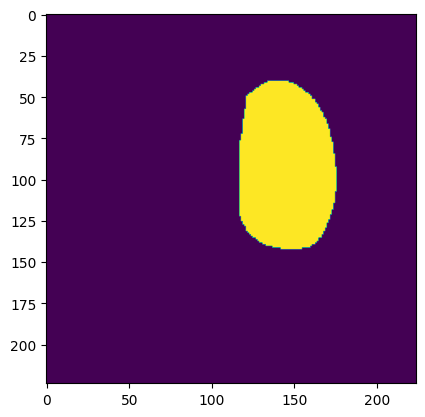

In [20]:
import matplotlib.pyplot as plt
mask = ds[0]["mask"] 
print(mask.shape)
plt.imshow(mask[15])

## Dice Score

In [32]:
from monai.metrics.meandice import compute_dice
import torch
input = torch.rand((1, 1, 352, 352))
target = torch.zeros_like(target)
compute_dice( input, target, ignore_empty=False)

tensor([[0.]])

In [28]:
target

tensor([[[[0.9677, 0.7976, 0.2418,  ..., 0.4350, 0.1871, 0.4091],
          [0.0438, 0.7347, 0.1341,  ..., 0.4527, 0.5314, 0.1878],
          [0.1945, 0.0616, 0.6207,  ..., 0.7440, 0.2759, 0.3921],
          ...,
          [0.4614, 0.7087, 0.0161,  ..., 0.3705, 0.2344, 0.2941],
          [0.1402, 0.3929, 0.5823,  ..., 0.0399, 0.2415, 0.7379],
          [0.0531, 0.6212, 0.2361,  ..., 0.5032, 0.0740, 0.1791]]]])

## Display Image

In [18]:
from PIL import Image
import numpy as np
from torchvision.transforms import v2 as T

/home/manish/sedoc/medvlsm/.venv/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/manish/sedoc/medvlsm/.venv/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any 

In [30]:
image = Image.open("/home/manish/sedoc/medvlsm/data/isic/images/0.jpg").convert("RGB")
mask = Image.open("/home/manish/sedoc/medvlsm/data/isic/masks/0.png")
transforms = T.Compose(
    [
        T.RandomCrop(size=(500, 500)),
        T.ToTensor(),
        T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)

/home/manish/sedoc/medvlsm/.venv/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [31]:
image, mask = transforms(image, mask)

In [32]:
image

tensor([[[ 0.8276,  0.8276,  0.8276,  ..., -0.0629, -0.0458, -0.0458],
         [ 0.8276,  0.8276,  0.8276,  ..., -0.0801, -0.0629, -0.0801],
         [ 0.8276,  0.8276,  0.8276,  ..., -0.0116, -0.0287, -0.0458],
         ...,
         [ 0.7077,  0.6734,  0.6734,  ..., -0.4739, -0.4568, -0.4226],
         [ 0.6906,  0.6906,  0.6906,  ..., -0.4397, -0.3883, -0.3369],
         [ 0.7248,  0.7077,  0.6906,  ..., -0.4054, -0.3027, -0.1828]],

        [[ 1.6408,  1.6408,  1.6408,  ..., -0.1800, -0.1625, -0.1625],
         [ 1.6408,  1.6408,  1.6408,  ..., -0.1800, -0.1800, -0.1800],
         [ 1.6408,  1.6408,  1.6408,  ..., -0.1099, -0.1275, -0.1450],
         ...,
         [ 1.3081,  1.3256,  1.3256,  ..., -0.5651, -0.5476, -0.5126],
         [ 1.3431,  1.3431,  1.3431,  ..., -0.5301, -0.4776, -0.4251],
         [ 1.3782,  1.3782,  1.3606,  ..., -0.4951, -0.3901, -0.2675]],

        [[ 2.5006,  2.5006,  2.5006,  ..., -0.0092,  0.0431,  0.0082],
         [ 2.5006,  2.5006,  2.5006,  ..., -0

In [2]:
import torch
import sys

In [3]:
sys.path.append("..")


In [4]:
from src.models import CLIPSeg

/mnt/Enterprise2/manish/conda_envs/medvlsm_3.10/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: ''If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/mnt/Enterprise2/manish/conda_envs/medvlsm_3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
torch_obj = torch.load("/home/manish/sedoc/medvlsm/logs/train/runs/clipseg_ft_kvasir_polyp_p0/checkpoints/best.ckpt")
model = CLIPSeg("CIDAS/clipseg-rd64-refined")
torch_obj

{'epoch': 29,
 'global_step': 210,
 'pytorch-lightning_version': '2.0.0',
 'state_dict': OrderedDict([('net.clipseg.clip.logit_scale',
               tensor(4.6052, device='cuda:0')),
              ('net.clipseg.clip.text_model.embeddings.position_ids',
               tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
                        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
                        72, 73, 74, 75, 76]], device='cuda:0')),
              ('net.clipseg.clip.text_model.embeddings.token_embedding.weight',
               tensor([[ 0.0177,  0.0010, -0.0088,  ...,  0.0023, -0.0227,  0.0072],
                       [ 0.0086,  0.0239, -0.0154,  ..., -0.0199, -0.0101,  0.0093],
                       [-0.0078, -0.0043,  0.01